##Reducción de Dimensiones - Análisis de Componentes Principales (PCA)

**Estudiantes:** 
*   Nombre: Erick Renán Godoy Llanqui

    Código de Estudiante: 171334



*   Nombre: David Hermenegildo Mamani Diaz

    Código de Estudiante: 171597

---
Inteligencia Computacional - VIII Ciclo - Grupo B, 2020-2

**Importar Librerias**

*   Pandas, para usar el Dataframe y dar una estructura al dataset
*   numpy, para realizar operaciones con matrices
*   Matplotlib, para la generación de graficos
*   sklearn, para el aprendizaje automatico
    *   StandarScaler, para la normalización de los datos
    *   PCA, para hacer uso del algoritmo de análisis de componentes principales

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

**Leer el dataset 'bank-additional.csv'**

In [ ]:
data = pd.read_csv('bank-additional.csv', sep=';' )
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


**Dimensionalidad del dataset**

In [ ]:
data.shape

(4119, 21)

**Analizar los tipos de datos del dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

**Formar un nuevo conjunto con los valores de entrada numéricos**

In [ ]:
features = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
X = data.loc[:, features].values

**Normalizar los valores del conjunto de entrada**

In [ ]:
X= StandardScaler().fit_transform(X)

**Aplicar el modelo PCA**

In [ ]:
pca = PCA(n_components = 2)  #Tranformar a dos variables de entrada
principales = pca.fit_transform(X)  #Entrenar el modelo
principalesDf = pd.DataFrame(data = principales, columns=["PC1","PC2"])   #Generar un nuevo dataframe con los valores generados

**Mostrar registros del nuevo dataset generado**

In [ ]:
principalesDf.head(5)

,PC1,PC2
0,2.093133,-1.695556
1,-1.380696,0.504383
2,-1.808099,-0.032193
3,-1.897078,0.209538
4,-0.121697,-0.545876


**Mostrar el pocentaje de varianza**

In [ ]:
pca.explained_variance_ratio_  #Conservacion de la variable original en porcentaje

array([0.38597082, 0.13708219])

**Añadir la columna de etiquetas al nuevo dataframe**

In [ ]:
finalDF = principalesDf
finalDF["Out"]= data["y"].values
finalDF.head(5)

,PC1,PC2,Out
0,2.093133,-1.695556,no
1,-1.380696,0.504383,no
2,-1.808099,-0.032193,no
3,-1.897078,0.209538,no
4,-0.121697,-0.545876,no


**Plotear la grafica usando el nuevo dataframe**

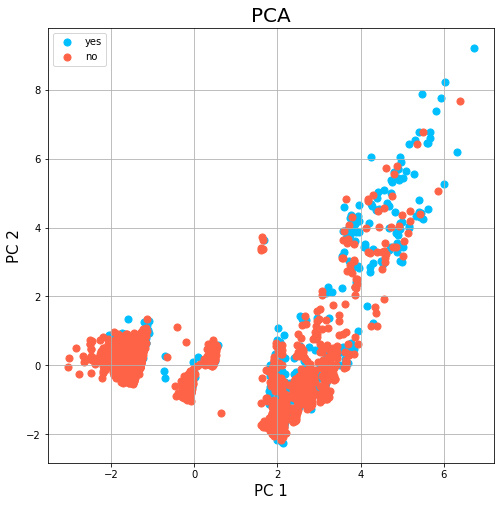

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = ['yes', 'no']
colors = ['deepskyblue','tomato']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Out'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC1']
               , finalDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()